# Project - Wifi



Wall width = 19cm # we will devide the wall into 2 parts (after we substract the 1 cm of the steel net)

Protected spaces wall width = 23cm # we will devide the wall into 3 parts(after we substract the 2 cm of the steel net)

The Mild Steel width = 1cm

Door width = 5cm (made of wood) and length of 70cm
and the protected space door width is 10cm (made of steel) and length of 70cm

The distance between the steel poles is 20cm and in protected spaces is 10cm, in 3D the poles becomes net.

In regular wall there is one net of steel and in protected spaces there are two

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import cv2

In [2]:
def Wall(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):

  '''
  epsilon is the matrix of the Permittivity of the wall
  mu is the matrix of the Permeability of the wall
  sigma is the matrix of the Conductivity of the Wall
  minIndex is the begining index of the Wall
  maxIndex is the ending index of the Wall
  location is the position of the center of the wall in the other axis
  direction might be only vertical or horizontal
  
  '''
  #I,J = mu.shape

  ConcretePermeability = 0.0000085 # H/m
  ConcretePermittivity = 20 # F/m
  ConcreteConductivity = 0.1 # S/m

  MildSteelpermeability = 0.0000045 # H/m
  MildSteelPermittivity = 7.85 # F/m
  MildSteelConductivity =  100000 # S/m

  

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal': # The wall is like _
    for j in range(minIndex, maxIndex):
      if j%20 == 0: # In location index, Each 20 cm there is another metal pole in vertical direction in the wall.
        epsilon[location,j] = MildSteelPermittivity
        mu[location,j] = MildSteelpermeability
        sigma[location,j] = MildSteelConductivity
      else: # All of the rest space in the wall except the metal poles.
        epsilon[location,j] = ConcretePermittivity
        mu[location,j] = ConcretePermeability
        sigma[location,j] = ConcreteConductivity

      # All of the rest from location index is full of concrete
      epsilon[location-9:location,j] = ConcretePermittivity
      epsilon[location+1:location+10,j] = ConcretePermittivity
      mu[location-9:location,j] = ConcretePermeability
      mu[location+1:location+10,j] = ConcretePermeability
      sigma[location-9:location,j] = ConcreteConductivity
      sigma[location+1:location+10,j] = ConcreteConductivity

      
  elif direction=='vertical': # The wall is like |
    for i in range(minIndex,maxIndex):
      if i%20 == 0: # In location index, Each 20 cm there is another metal pole in vertical direction in the wall.
        epsilon[i,location] = MildSteelPermittivity
        mu[i,location] = MildSteelpermeability
        sigma[i,location] = MildSteelConductivity
      else: # All of the rest space in the wall except the metal poles.
        epsilon[i,location] = ConcretePermittivity
        mu[i,location] = ConcretePermeability
        sigma[i,location] = ConcreteConductivity

      # All of the rest from location index is full of concrete
      epsilon[i,location-9:location] = ConcretePermittivity
      epsilon[i,location+1:location+10] = ConcretePermittivity
      mu[i,location-9:location] = ConcretePermeability
      mu[i,location+1:location+10] = ConcretePermeability
      sigma[i,location-9:location] = ConcreteConductivity
      sigma[i,location+1:location+10] = ConcreteConductivity

      
  return(epsilon, mu, sigma)


def ProtectedWall(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the protected wall
  mu is the matrix of the Permeability of the protected wall
  sigma is the matrix of the Conductivity of the protected Wall
  minIndex is the begining index of the protected Wall
  maxIndex is the ending index of the protected Wall
  location is the position of the center of the protected wall in the other axis
  direction might be only vertical or horizontal
  
  '''

  #I,J = mu.shape

  ConcretePermeability = 0.0000085 # H/m
  ConcretePermittivity = 20 # F/m
  ConcreteConductivity = 0.1 # S/m

  MildSteelpermeability = 0.0000045 # H/m
  MildSteelPermittivity = 7.85 # F/m
  MildSteelConductivity =  100000 # S/m

  

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal':
    for j in range(minIndex,maxIndex):
      if j%10 == 0: # In location index, Each 10 cm there is another metal pole in vertical direction in the wall.
        # Two metal poles at vertical positions to each other
        epsilon[location-4,j] = MildSteelPermittivity 
        epsilon[location+4,j] = MildSteelPermittivity

        mu[location-4,j] = MildSteelpermeability
        mu[location+4,j] = MildSteelpermeability

        sigma[location-4,j] = MildSteelConductivity
        sigma[location+4,j] = MildSteelConductivity

      else: # Between the poles
        
        epsilon[location-4,j] = ConcretePermittivity
        epsilon[location+4,j] = ConcretePermittivity

        mu[location-4,j] = ConcretePermeability
        mu[location+4,j] = ConcretePermeability

        sigma[location-4,j] = ConcreteConductivity
        sigma[location+4,j] = ConcreteConductivity

      # All of the rest space is full of concrete
      epsilon[location-11:location-4,j] = ConcretePermittivity
      epsilon[location-3:location+4,j] = ConcretePermittivity
      epsilon[location+5:location+12,j] = ConcretePermittivity

      mu[location-11:location-4,j] = ConcretePermeability
      mu[location-3:location+4,j] = ConcretePermeability
      mu[location+5:location+12,j] = ConcretePermeability

      sigma[location-11:location-4,j] = ConcreteConductivity
      sigma[location-3:location+4,j] = ConcreteConductivity
      sigma[location+5:location+12,j] = ConcreteConductivity

      
  elif direction=='vertical':
    for i in range(minIndex,maxIndex):
      if i%10 == 0: # In location index, Each 10 cm there is another metal pole in vertical direction in the wall.
        # Two metal poles at horizontal positions to each other
        epsilon[i,location-4] = MildSteelPermittivity
        epsilon[i,location+4] = MildSteelPermittivity

        mu[i,location-4] = MildSteelpermeability
        mu[i,location+4] = MildSteelpermeability

        sigma[i,location-4] = MildSteelConductivity
        sigma[i,location+4] = MildSteelConductivity

      else: 
        # Between the poles
        epsilon[i,location-4] = ConcretePermittivity
        epsilon[i,location+4] = ConcretePermittivity

        mu[i,location-4] = ConcretePermeability
        mu[i,location+4] = ConcretePermeability

        sigma[i,location-4] = ConcreteConductivity
        sigma[i,location+4] = ConcreteConductivity

      # All of the rest space is full of concrete
      epsilon[i,location-11:location-4] = ConcretePermittivity
      epsilon[i,location-3:location+4] = ConcretePermittivity
      epsilon[i,location+5:location+12] = ConcretePermittivity

      mu[i,location-11:location-4] = ConcretePermeability
      mu[i,location-3:location+4] = ConcretePermeability
      mu[i,location+5:location+12] = ConcretePermeability

      sigma[i,location-11:location-4] = ConcreteConductivity
      sigma[i,location-3:location+4] = ConcreteConductivity
      sigma[i,location+5:location+12] = ConcreteConductivity

      
  return(epsilon, mu, sigma)

def Door(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the door
  mu is the matrix of the Permeability of the door
  sigma is the matrix of the Conductivity of the door
  minIndex is the begining index of the door
  maxIndex is the ending index of the door
  location is the position of the center of the door in the other axis
  direction might be only vertical or horizontal
  '''
   
  Woodpermeability = 0.0000006 # H/m
  WoodPermittivity = 5 # F/m
  WoodConductivity =  0.05 # S/m

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal': # Like _
      # The length & width are known, and they full of wood
      epsilon[location-2:location+3,minIndex:maxIndex] = WoodPermittivity
      mu[location-2:location+3,minIndex:maxIndex] = Woodpermeability
      sigma[location-2:location+3,minIndex:maxIndex] = WoodConductivity
      
  elif direction == 'vertical': # Like |
      # The length & width are known, and they full of wood
      epsilon[minIndex:maxIndex,location-2:location+3] = WoodPermittivity
      mu[minIndex:maxIndex,location-2:location+3] = Woodpermeability
      sigma[minIndex:maxIndex,location-2:location+3] = WoodConductivity

  return(epsilon, mu, sigma)

def GlassDoor(epsilon, mu, sigma, minIndex, maxIndex, location):
  '''
  epsilon is the matrix of the Permittivity of the GlassDoor
  mu is the matrix of the Permeability of the GlassDoor
  sigma is the matrix of the Conductivity of the GlassDoor
  minIndex is the begining index of the GlassDoor
  maxIndex is the ending index of the GlassDoor
  location is the position of the center of the GlassDoor in the other axis
  direction might be only vertical or horizontal
  '''
   
  Glasspermeability = 1 # H/m
  GlassPermittivity = 6 # F/m
  GlassConductivity =  0 # S/m

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)


  # There is only one configuration of this kind - horizontal
  epsilon[location-2:location+3,minIndex:maxIndex] = GlassPermittivity
  mu[location-2:location+3,minIndex:maxIndex] = Glasspermeability
  sigma[location-2:location+3,minIndex:maxIndex] = GlassConductivity
      
  return(epsilon, mu, sigma)


def ProtectedDoor(epsilon, mu, sigma, minIndex, maxIndex, location, direction = 'None'):
  '''
  epsilon is the matrix of the Permittivity of the ProtectedDoor
  mu is the matrix of the Permeability of the ProtectedDoor
  sigma is the matrix of the Conductivity of the ProtectedDoor
  minIndex is the begining index of the ProtectedDoor
  maxIndex is the ending index of the ProtectedDoor
  location is the position of the center of the ProtectedDoor in the other axis
  direction might be only vertical or horizontal
  '''
   
  Steelpermeability = 200 # H/m
  SteelPermittivity = 22 # F/m
  SteelConductivity =  10**5 # S/m

  epsilon = np.copy(epsilon)
  mu = np.copy(mu)
  sigma = np.copy(sigma)

  if direction == 'horizontal': # Like _
      # The all door is full of steel 
      epsilon[location-5:location+5,minIndex:maxIndex] = SteelPermittivity
      mu[location-5:location+5,minIndex:maxIndex] = Steelpermeability
      sigma[location-5:location+5,minIndex:maxIndex] = SteelConductivity
      
  elif direction=='vertical': # Like |
      # The all door is full of steel 
      epsilon[minIndex:maxIndex,location-5:location+5] = SteelPermittivity
      mu[minIndex:maxIndex,location-5:location+5] = Steelpermeability
      sigma[minIndex:maxIndex,location-5:location+5] = SteelConductivity

  return(epsilon, mu, sigma)
    

<img src = "סקיצת בית.png" alt="Alternative text" />

In [3]:
def LevisHome():
  '''Creating the home permittivity, permeability and conductivity matrixes
     according to the sketch above'''

  dx = 10**-2 # in meters - the size of 1 pixel
  dy = 1.0*dx

  PixelLengthOfTheHouse = int(11/dx) # axis x # house length is 1470 cm
  PixelWidthOfTheHouse = int(15/dy) # axis y # house length is 1087 cm

  airConductivuty=0

  epsilon = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse]) # House Permittivity matrix  
  mu = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse]) # House Permeability matrix
  sigma = np.ones([PixelWidthOfTheHouse,PixelLengthOfTheHouse])*airConductivuty # House Conductivity matrix

  # Externals wall
  FirstLeftOterWall = 15+19+105+19+125+19+505
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, 15, FirstLeftOterWall, 7+158+10,'vertical') 

  SecondLeftOterWall = 19+385 + FirstLeftOterWall
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, FirstLeftOterWall, SecondLeftOterWall, 7+10,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, 7, 7+19+158, FirstLeftOterWall-10,'horizontal')

  ToGlass = 7+19+158
  Glass = 192+ ToGlass
  FromGlass = 158 + Glass
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, 7, ToGlass, SecondLeftOterWall-10,'horizontal') 
  epsilon, mu, sigma = GlassDoor(epsilon, mu, sigma, ToGlass, Glass, SecondLeftOterWall-10) 
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, Glass, FromGlass, SecondLeftOterWall-10,'horizontal') 

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, SecondLeftOterWall, 1500-15, FromGlass-10,'vertical')

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, FromGlass, 1100-6, 1500-15-10,'horizontal') 

  FirstRightOwterWallProtected = 15+23+285+23
  FirstRightOwterWall = FirstRightOwterWallProtected+295+19+195+19
  epsilon, mu, sigma = ProtectedWall(epsilon, mu, sigma, 15, FirstRightOwterWallProtected, 1100-6-172+10,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, FirstRightOwterWallProtected, FirstRightOwterWall, 1100-6-172+10,'vertical')

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, 1100-6-172+2, 1100-6, FirstRightOwterWall-10-(345-285),'horizontal') 

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, FirstRightOwterWall-(345-285)-19, 1500-15, 1100-6-10,'vertical')


  # Small toilet
  toilteFirstHorizontal = 7+19+260+158+19 # end point
  homeLeftWall = 7+158 +19
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, 7+158, toilteFirstHorizontal, 15+10,'horizontal') 
  DavidDooPosition = 7+19+158+219
  toiletwallBegining = 15+19
  toiletdoorBegining = toiletwallBegining + 20
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, toiletwallBegining, toiletdoorBegining, DavidDooPosition+10,'vertical')
  toiletWallContionu = toiletdoorBegining+70
  epsilon, mu, sigma = Door(epsilon, mu, sigma, toiletdoorBegining, toiletWallContionu, DavidDooPosition+3,'vertical')
  toiletwallend = toiletWallContionu +15+19
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, toiletWallContionu, toiletwallend, DavidDooPosition+10,'vertical')

  Wall2Position = 15+19+105+10
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, homeLeftWall, homeLeftWall+219+19, Wall2Position,'horizontal') 


  # David's room
  David2wall = Wall2Position+19+125
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, homeLeftWall, homeLeftWall+260+19, David2wall,'horizontal') 
  DavidBeginWall = toiletwallend
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, DavidBeginWall, DavidBeginWall+10, DavidDooPosition+10,'vertical')
  DavidDoorEnd = DavidBeginWall+10+70
  epsilon, mu, sigma = Door(epsilon, mu, sigma, DavidBeginWall+5, DavidDoorEnd, DavidDooPosition+3,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, DavidDoorEnd, DavidDoorEnd+64, DavidDooPosition+10,'vertical')

  
  #Shahar's room
  ShaharWallHorizontalend = toilteFirstHorizontal+90+23+340+23
  epsilon, mu, sigma = ProtectedWall(epsilon, mu, sigma, toilteFirstHorizontal+70, ShaharWallHorizontalend, 15+12,'horizontal')
  ShaharDoorPosition = 1100-6-19-172-340
  ShaharWallVerticalBegin = 15+23
  ShaharDoorBegin = ShaharWallVerticalBegin+110
  epsilon, mu, sigma = ProtectedWall(epsilon, mu, sigma, ShaharWallVerticalBegin, ShaharDoorBegin, ShaharDoorPosition,'vertical') 
  ShaharDoorEnd = ShaharDoorBegin+70
  epsilon, mu, sigma = ProtectedDoor(epsilon, mu, sigma, ShaharDoorBegin, ShaharDoorEnd, ShaharDoorPosition,'vertical') 
  ShaharWallVerticalEnd = ShaharDoorEnd +105
  epsilon, mu, sigma = ProtectedWall(epsilon, mu, sigma, ShaharDoorEnd, ShaharWallVerticalEnd, ShaharDoorPosition,'vertical') 

  ShaharVerticalWallLocation = 15+23+285
  epsilon, mu, sigma = ProtectedWall(epsilon, mu, sigma, ShaharDoorPosition-11, ShaharWallHorizontalend, ShaharVerticalWallLocation+12,'horizontal')

  # Boy's room
  BoyVerticalwallEnd = ShaharWallVerticalEnd+23+295+19
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, ShaharWallVerticalEnd+23, BoyVerticalwallEnd, ShaharDoorPosition,'vertical')
  
  BoysHorizontallPosition = BoyVerticalwallEnd-10
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, ShaharDoorPosition, ShaharDoorPosition+5, BoysHorizontallPosition,'horizontal')
  BoysHorizontalBegin = ShaharDoorPosition+5+70
  epsilon, mu, sigma = Door(epsilon, mu, sigma, ShaharDoorPosition+5, BoysHorizontalBegin, BoysHorizontallPosition,'horizontal')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, BoysHorizontalBegin, BoysHorizontalBegin+280+19, BoysHorizontallPosition,'horizontal')

  # Large toilet
  HorizontalToilerLargeEnd = 1100-6-172
  HorizontalToilerLargeBegin = HorizontalToilerLargeEnd-19-240
  LargeToiletHorizontalPositoin = 15+23+285+23+295+19+195+10
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, HorizontalToilerLargeBegin, HorizontalToilerLargeEnd, LargeToiletHorizontalPositoin,'horizontal')
  BigToiletDoorPosition = 1100-6-172-240-10
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, BoyVerticalwallEnd, BoyVerticalwallEnd+100, BigToiletDoorPosition,'vertical')
  epsilon, mu, sigma = Door(epsilon, mu, sigma, BoyVerticalwallEnd+100, BoyVerticalwallEnd+100+70, BigToiletDoorPosition-3,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, BoyVerticalwallEnd+100+70, BoyVerticalwallEnd+195, BigToiletDoorPosition,'vertical')


  #epsilon, mu, sigma = Wall(epsilon, mu, sigma, ShaharWallVerticalEnd+23, BoyVerticalwallEnd, ShaharDoorPosition,'vertical')

  # Kitchen and livingroom
  beginFrigeWall = DavidDoorEnd+64
  endFrigeWall = beginFrigeWall +136
  FrigeWallPosition = 7+158+19+260+10
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, beginFrigeWall, endFrigeWall, FrigeWallPosition,'vertical')

  # Parents and girls hall's wall
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, SecondLeftOterWall-385, SecondLeftOterWall, FromGlass-10,'vertical')

  # Girl's room
  VerticalGirlsBegin = BoyVerticalwallEnd+19+195
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, VerticalGirlsBegin, VerticalGirlsBegin+5, BigToiletDoorPosition,'vertical')
  epsilon, mu, sigma = Door(epsilon, mu, sigma, VerticalGirlsBegin+5, VerticalGirlsBegin+5+70, BigToiletDoorPosition,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, VerticalGirlsBegin+75, VerticalGirlsBegin+285, BigToiletDoorPosition,'vertical')

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, BigToiletDoorPosition-10, 1100-6-19, LargeToiletHorizontalPositoin+285,'horizontal')


  # Parents room
  ParentsDoorPosition = 1500-15-19-296-70-10
  ParentsWallDoorBegin = BigToiletDoorPosition-10-20-70-20
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, ParentsWallDoorBegin-17, ParentsWallDoorBegin+20, ParentsDoorPosition,'horizontal')
  epsilon, mu, sigma = Door(epsilon, mu, sigma, ParentsWallDoorBegin+20, ParentsWallDoorBegin+20+70, ParentsDoorPosition,'horizontal')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, ParentsWallDoorBegin+20+70, ParentsWallDoorBegin+20+70+20, ParentsDoorPosition,'horizontal')


  # Parents toilet
  DoortoiletParentsPostition = 1100-6-19-135-10
  RightVerticalWalltoiletparents = 1500-15-19-296-19

  epsilon, mu, sigma = Wall(epsilon, mu, sigma, RightVerticalWalltoiletparents, RightVerticalWalltoiletparents+140, DoortoiletParentsPostition,'vertical')
  epsilon, mu, sigma = Door(epsilon, mu, sigma, RightVerticalWalltoiletparents+140, RightVerticalWalltoiletparents+140+70, DoortoiletParentsPostition,'vertical')
  epsilon, mu, sigma = Wall(epsilon, mu, sigma, RightVerticalWalltoiletparents+140+70, RightVerticalWalltoiletparents+140+70+86+19, DoortoiletParentsPostition,'vertical')


  homePermittivity = epsilon; homePermeability = mu; homeConductivity = sigma
  return(homePermittivity, homePermeability, homeConductivity)

every pixel is 1 cm

In [3]:
# Video decliration
# output_filename = 'LevisHomeWiFi.mp4'
# fps = 30
# frame_size = (640, 480)
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# out = cv2.VideoWriter(output_filename, fourcc, fps, frame_size)

$$ -2\sqrt{\frac{\mu}{\varepsilon}}\sigma d = -8$$
$$ d = 5\Delta x $$
$$ sigma = \frac{4}{5\Delta x} \sqrt{\frac{\varepsilon}{\mu}}$$

$$ \sigma(x) = \left( \frac{x}{d} \right) ^m \cdot \sigma_{max}$$
$$ \int_0^{d} \sigma (x) dx = \left[ \frac{\left( \frac{x}{d} \right) ^{m+1}\cdot \sigma_{max}}{(m+1)*\frac{1}{d}}\right]_0^d = \frac{d\sigma_{max}}{m+1}$$

chose $$ m=4$$
and we get
$$ \sigma _{max} = \frac{4}{\Delta x} $$

In [4]:
# variable decliration

dx = 10**-2 # in meters
dy = 1.0*dx
# dz = ??? 3D 
c = 1
tmin = 0
tmax = 40
dt = dx/c
dPML = 5*dx
xmax = 11

ymax = 15

nx = int((xmax)/dx) # axis x
ny = int((ymax)/dy) # axis y
nt = int((tmax-tmin)/dt)

xE = np.linspace(-xmax/2, xmax/2, nx)
xH = np.linspace(-xmax/2, xmax/2, nx)

yE = np.linspace(-ymax/2, ymax/2, ny)
yH = np.linspace(-ymax/2, ymax/2, ny)

YYE, XXE = np.meshgrid(xE,yE) 
YYH, XXH = np.meshgrid(xH,yH)

EX = np.zeros([ny,nx]) # 0*XXE
EY = np.zeros([ny,nx]) # 0*XXE
HZX = np.zeros([ny,nx]) 
HZY = np.zeros([ny,nx])

dyHz = np.zeros([ny,nx])
dxHz = np.zeros([ny,nx])
dxEY = np.zeros([ny,nx])
dyEX = np.zeros([ny,nx])

EX0 = 0*XXE # the initial condition are 0
EY0 = 0*YYE
H0 = 0

EX = 1.0*EX0 # impose initial condition 
EY = 1.0*EY0

J0 = 1.0
omega = 2*np.pi*5*10**9/(3*10**8) # 5GHz is the WiFi frequency
ylocationOfRauter = 15+19+105+19+125+19+505+80+10-ymax/(2*dy)
xlocationOfRauter = 7+19-xmax/(2*dx)
sourceE = (XXE-xlocationOfRauter*dx)**2 + (YYE-ylocationOfRauter*dy)**2 < 0.02

epsilon, mu, sigma = LevisHome()

sigmaMax = 4/dx
m = 4

sigmaxE = sigmaMax*(np.abs(XXE)>(xmax-dPML))*(np.abs(XXE)-(xmax-dPML))**m/dPML**m + sigma*(np.abs(XXE)<=(xmax-dPML))
sigmayE = sigmaMax*(np.abs(YYE)>(ymax-dPML))*(np.abs(YYE)-(ymax-dPML))**m/dPML**m + sigma*(np.abs(XXE)<=(ymax-dPML))
sigmaxH = sigmaMax*(np.abs(XXH)>(xmax-dPML))*(np.abs(XXH)-(xmax-dPML))**m/dPML**m
sigmayH = sigmaMax*(np.abs(YYH)>(ymax-dPML))*(np.abs(YYH)-(ymax-dPML))**m/dPML**m





we have 4 equation:
$$  \frac{\partial H_{zx}}{\partial (ct)} = - \frac{1}{\mu_r}\frac{\partial E_y}{\partial x} - \sigma^*_xH_{zx}  $$
$$  \frac{\partial H_{zy}}{\partial (ct)} = \frac{1}{\mu_r}\frac{\partial E_x}{\partial y} - \sigma^*_yH_{zy} $$
$$  \frac{\partial E_x}{\partial (ct)}  = \frac{1}{\varepsilon_r}\frac{\partial H_z}{\partial y} - \sigma _yE_x$$
$$  \frac{\partial E_y}{\partial (ct)}  = - \frac{1}{\varepsilon_r}\frac{\partial H_z}{\partial x} - \sigma _xE_y $$



In [5]:
# Promoting H by half step
for i in range(ny-1): # H is a smaller array, nx-1, and we use it for H.
    for j in range(nx-1):
        dxEY[i,j] = 0.5*(EY[i+1,j] + EY[i+1,j+1] - EY[i,j] - EY[i,j+1])/dx 
        dyEX[i,j] = 0.5*(EX[i,j+1] + EX[i+1,j+1] - EX[i,j] - EX[i+1,j])/dy 

HZX = H0/2 - c*dt/2*dxEY
HZY = H0/2 - c*dt/2*dyEX

H = HZX + HZY

KeyboardInterrupt: 

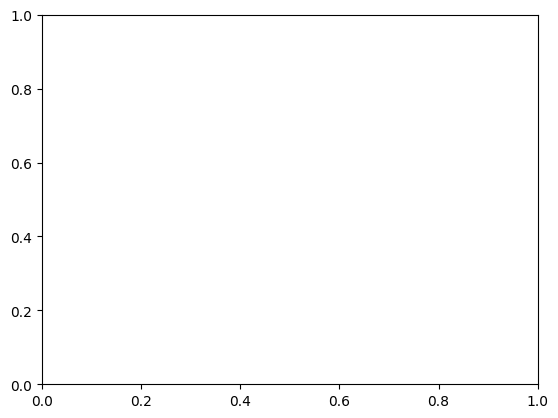

In [6]:
levels = np.linspace(-1, 1, 35)
for n in range(nt):
    for i in range(1,ny):
        for j in range(1,nx):
            
            dyHz[i,j] = 0.5*(H[i,j] + H[i-1,j] - H[i,j-1] - H[i-1,j-1])/dy # dy Hz
            dxHz[i,j] = 0.5*(H[i,j] + H[i,j-1] - H[i-1,j] - H[i-1,j-1])/dx
     
    EX += c*dt*dyHz/epsilon - c*dt*sigmayE*EX - J0*sourceE*dt*np.sin(omega*n*dt)/epsilon
    EY += -c*dt*dxHz/epsilon - c*dt*sigmaxE*EY
    
    #step = 1
    
    for i in range(0,ny-1):
        for j in range(0,nx-1):
            dxEY[i,j] = 0.5*(EY[i+1,j] + EY[i+1,j+1] - EY[i,j] - EY[i,j+1])/dx 
            dyEX[i,j] = 0.5*(EX[i,j+1] + EX[i+1,j+1] - EX[i,j] - EX[i+1,j])/dy 

    HZX += - c*dt*dxEY/mu - c*dt*sigmaxH*HZX
    HZY += c*dt*dyEX/mu - c*dt*sigmayH*HZY

    H = HZX + HZY

    #if n%step==0:
    plt.clf(); plt.contourf(XXH,YYH,H,levels); plt.colorbar(); plt.title("Wifi - levi's huse"); #plt.pause(0.4);
#     fig = plt.gcf()
#     fig.canvas.draw()
#     frame = np.array(fig.canvas.renderer.buffer_rgba())
#     frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2BGR)
#     out.write(frame)
#     plt.clf()

# out.release()
        
        

In [324]:

# PixelheightOfTheHouse in 3D

# XX, YY = np.meshgrid(range(PixelLengthOfTheHouse),range(PixelWidthOfTheHouse))


In [7]:

# PixelheightOfTheHouse in 3D

XX, YY = np.meshgrid(range(PixelLengthOfTheHouse),range(PixelWidthOfTheHouse))

airConductivuty=0.0005
epsilon = np.ones([PixelLengthOfTheHouse,PixelWidthOfTheHouse])# the matrix of the Permittivity of the house 
mu = np.ones([PixelLengthOfTheHouse,PixelWidthOfTheHouse]) # the matrix of the Permeability of the house
sigma = np.ones([PixelLengthOfTheHouse,PixelWidthOfTheHouse])*airConductivuty # the matrix of the Conductivity of the house


e, m, s = LevisHome()
plt.figure(); plt.contourf(XX,YY,e); plt.colorbar(); plt.title('epsilon')
plt.figure(); plt.contourf(XX,YY,m); plt.colorbar(); plt.title('mu')
plt.figure(); plt.contourf(XX,YY,s); plt.colorbar(); plt.title('sigma');



NameError: name 'PixelLengthOfTheHouse' is not defined

In [16]:
x,y = np.meshgrid([1,2],[1,2,3])
x

array([[1, 2],
       [1, 2],
       [1, 2]])